# Importer les outils

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as solveur

# Définir les constantes du problème

In [0]:
k1 = 0.25
k2 = 0.1
k3 = 5
CA0 = 1.5
CB0 = 2
Vdot = 10

# Définir les équations à résoudre

In [0]:
def equations(variables,V, k1, k2, k3, Vdot):
  FA, FB, FC, FD, FE, FF = variables # attention l'ordre est important !
  
  CA = FA / Vdot
  CB = FB / Vdot
  CC = FC / Vdot
  CD = FD / Vdot
  CE = FE / Vdot
  CF = FF / Vdot
  
  r1 = k1 * CA * CB
  r2 = k2 * CA * CD
  r3 = k3 * CB**2 * CC
  
  RA = -r1-3*r2
  RB = -2*r1-r3
  RC = r1+r2-2*r3
  RD = r1-2*r2+r3
  RE = r2
  RF = r3
  
  dFAdV = RA
  dFBdV = RB
  dFCdV = RC
  dFDdV = RD
  dFEdV = RE
  dFFdV = RF
  
  return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV # attention l'ordre est important !

# Définir les conditions initiales

In [0]:
conditions_initiales = [CA0 * Vdot, CB0 * Vdot, 0, 0, 0, 0] # attention l'ordre est important !

# Résoudre le problème à l'aide du solveur

In [0]:
V = np.linspace(0, 50, 51) # définir les bornes d'intégration
resultats = solveur.odeint(equations,conditions_initiales,V, (k1, k2, k3, Vdot)) # dans le cas où on a qu'une constante il faut écrire (k,) => Tuple

In [0]:
FA = resultats[:,0] # récupérer toutes les lignes ":" de la première colonne "indice 0"
FB = resultats[:,1]
FC = resultats[:,2]
FD = resultats[:,3]
FE = resultats[:,4]
FF = resultats[:,5]

taux de conversion

In [0]:
FA0 = CA0 * Vdot
X = 1 -(FA/FA0)

# Visualiser les résultats

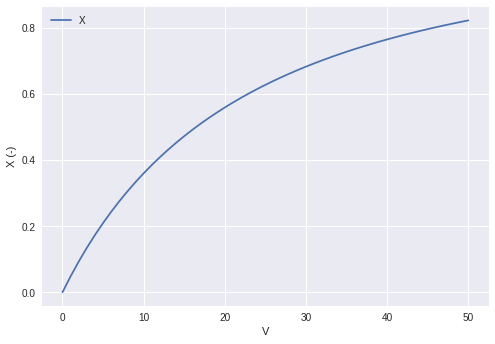

In [92]:
plt.plot(V, X)
plt.xlabel('V')
plt.ylabel('X (-)') # X est sans unité
plt.legend(['X'])
plt.show()

In [93]:
X[V < 50][-1]

0.817780327470462

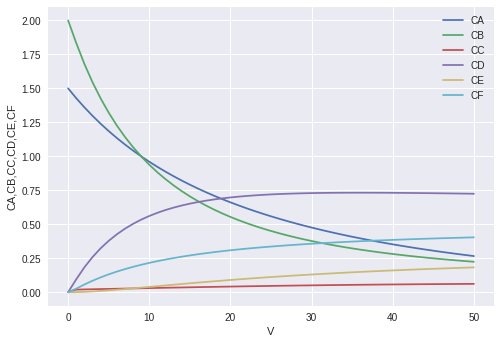

In [94]:
CA = FA / Vdot
CB = FB / Vdot
CC = FC / Vdot
CD = FD / Vdot
CE = FE / Vdot
CF = FF / Vdot

plt.plot(V, CA, V, CB, V, CC, V, CD, V, CE, V, CF)
plt.xlabel('V')
plt.ylabel('CA,CB,CC,CD,CE,CF')
plt.legend(['CA', 'CB', 'CC', 'CD', 'CE', 'CF'])
plt.show()

In [95]:
CC[V < 50][-1]

0.06107795531995793